## Capstone project 20.1 - Assignment 20
### Initial Report and Exploratory Data Analysis (EDA)

### Knowledge Base Quality System (KBQS) Model

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('risk.csv')
df.sample(5)

,Type,Created,Week,Month,Year,Site,Finding,Repeat Finding,Hangar / Shop,TEAM,Main Applicable Rule (Finding Code),Applicable Rules 2,Main Root Cause,Additional Root Causes 2,Cluster,Risk,Quality escape,Loading,Cert/total
264,3PY,44819.45591,38,9,2022,Savannah,​Aircraft hours and work order number incorrec...,NaN,SAV-C,team 2,A1. Missing/Incorrect documentation,NaN,NaN,NaN,RECORD OF MAINTENANCE,2.310586,Yes,0.892377,0.350000
64,1PY,44641.62664,13,3,2022,Savannah,tech installed several panel and left 2 screws...,NaN,SAV-C,team 5,G2 Loose or Improperly installed fasteners,NaN,NaN,NaN,INSPECTION & QUALITY SYSTEM,0.089446,No,1.527115,0.460000
265,3PY,44824.57819,39,9,2022,Savannah,​A/C 4029's DFDR was tested in the backshop an...,NaN,SAV-C,team 2,A1. Missing/Incorrect documentation,NaN,NaN,NaN,RECORD OF MAINTENANCE,2.310586,Yes,0.866082,0.350000
204,2PY,43973.52594,21,5,2020,Savannah,Service center HRT aircraft flight control mov...,NaN,SAV-C,team 2,A1. Missing/Incomplete Line Signs or Steps to...,NaN,NaN,NaN,RECORD OF MAINTENANCE,1.155293,No,1.288590,0.490668
152,1PY,43847.46490,3,1,2020,Savannah,"While giving ok to install VHF #3 antenna, fou...",NaN,SAV-C,team 2,A5 Incomplete/Improperly Filled Out Paperwork,NaN,NaN,NaN,RECORD OF MAINTENANCE,0.057765,No,1.407690,0.593963


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Type                                 283 non-null    object 
 1   Created                              283 non-null    float64
 2   Week                                 283 non-null    int64  
 3   Month                                283 non-null    int64  
 4   Year                                 283 non-null    int64  
 5   Site                                 283 non-null    object 
 6   Finding                              283 non-null    object 
 7   Repeat Finding                       4 non-null      object 
 8   Hangar / Shop                        283 non-null    object 
 9   TEAM                                 283 non-null    object 
 10  Main Applicable Rule (Finding Code)  283 non-null    object 
 11  Applicable Rules 2              

### Understanding the Data

In [4]:
df.describe()

,Created,Week,Month,Year,Risk,Loading,Cert/total
count,283.000000,283.000000,283.000000,283.000000,283.000000,281.000000,283.000000
mean,44406.881664,23.872792,5.766784,2021.141343,2.012558,1.392975,0.477271
std,340.597242,15.400956,3.554344,0.989925,5.940594,0.233703,0.070986
min,43804.356980,1.000000,1.000000,2019.000000,0.057765,0.866082,0.346801
25%,44054.316475,10.000000,3.000000,2020.000000,0.057765,1.261345,0.450000
50%,44574.421410,22.000000,5.000000,2022.000000,0.089446,1.407690,0.474039
75%,44658.667140,34.000000,8.000000,2022.000000,1.155293,1.542847,0.510000
max,44824.578190,53.000000,12.000000,2022.000000,26.833765,2.119734,0.619787


In [5]:
cluster = df.groupby('Cluster').agg(sum)[['Risk']].sort_values('Risk', ascending = False)
#df['Cluster'].value_counts().plot(kind='pie', autopct='%1.1f%%')
cluster

,Risk
Cluster,
EDUCATION & TRAINING,161.002590
RECORD OF MAINTENANCE,106.922344
INSPECTION & QUALITY SYSTEM,79.690070
TOOL CONTROL & MANAGEMENT,76.466912
SAFETY,51.147868
QUALITY SUPPORT,37.255436
TECHNICAL DATA,26.968678
TECHNICAL PERSONNEL,26.833765
PARTS/MATERIAL MANAGEMENT & CONTROL,3.104565


<AxesSubplot:ylabel='None'>

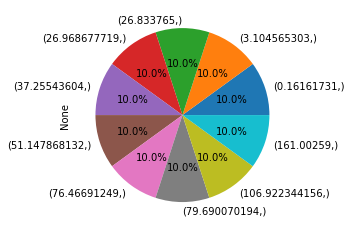

In [8]:
cluster.value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:title={'center':'Risk index per team'}, xlabel='TEAM', ylabel='Risk'>

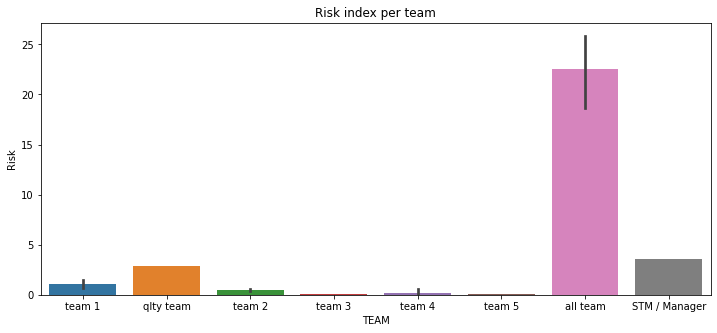

In [9]:
plt.figure(figsize = (12,5))
plt.title("Risk index per team")
sns.barplot(data=df, x='TEAM', y='Risk')

In [10]:
team = df.groupby('TEAM').agg(sum)[['Risk']].sort_values('Risk', ascending = False)
team

,Risk
TEAM,
all team,428.970241
team 2,102.898682
team 1,25.007492
qlty team,5.776464
STM / Manager,3.577835
team 4,1.533562
team 5,1.469066
team 3,0.320504


In [11]:
quality_escape = df['Quality escape'].value_counts(normalize = True)
quality_escape

No     0.90106
Yes    0.09894
Name: Quality escape, dtype: float64

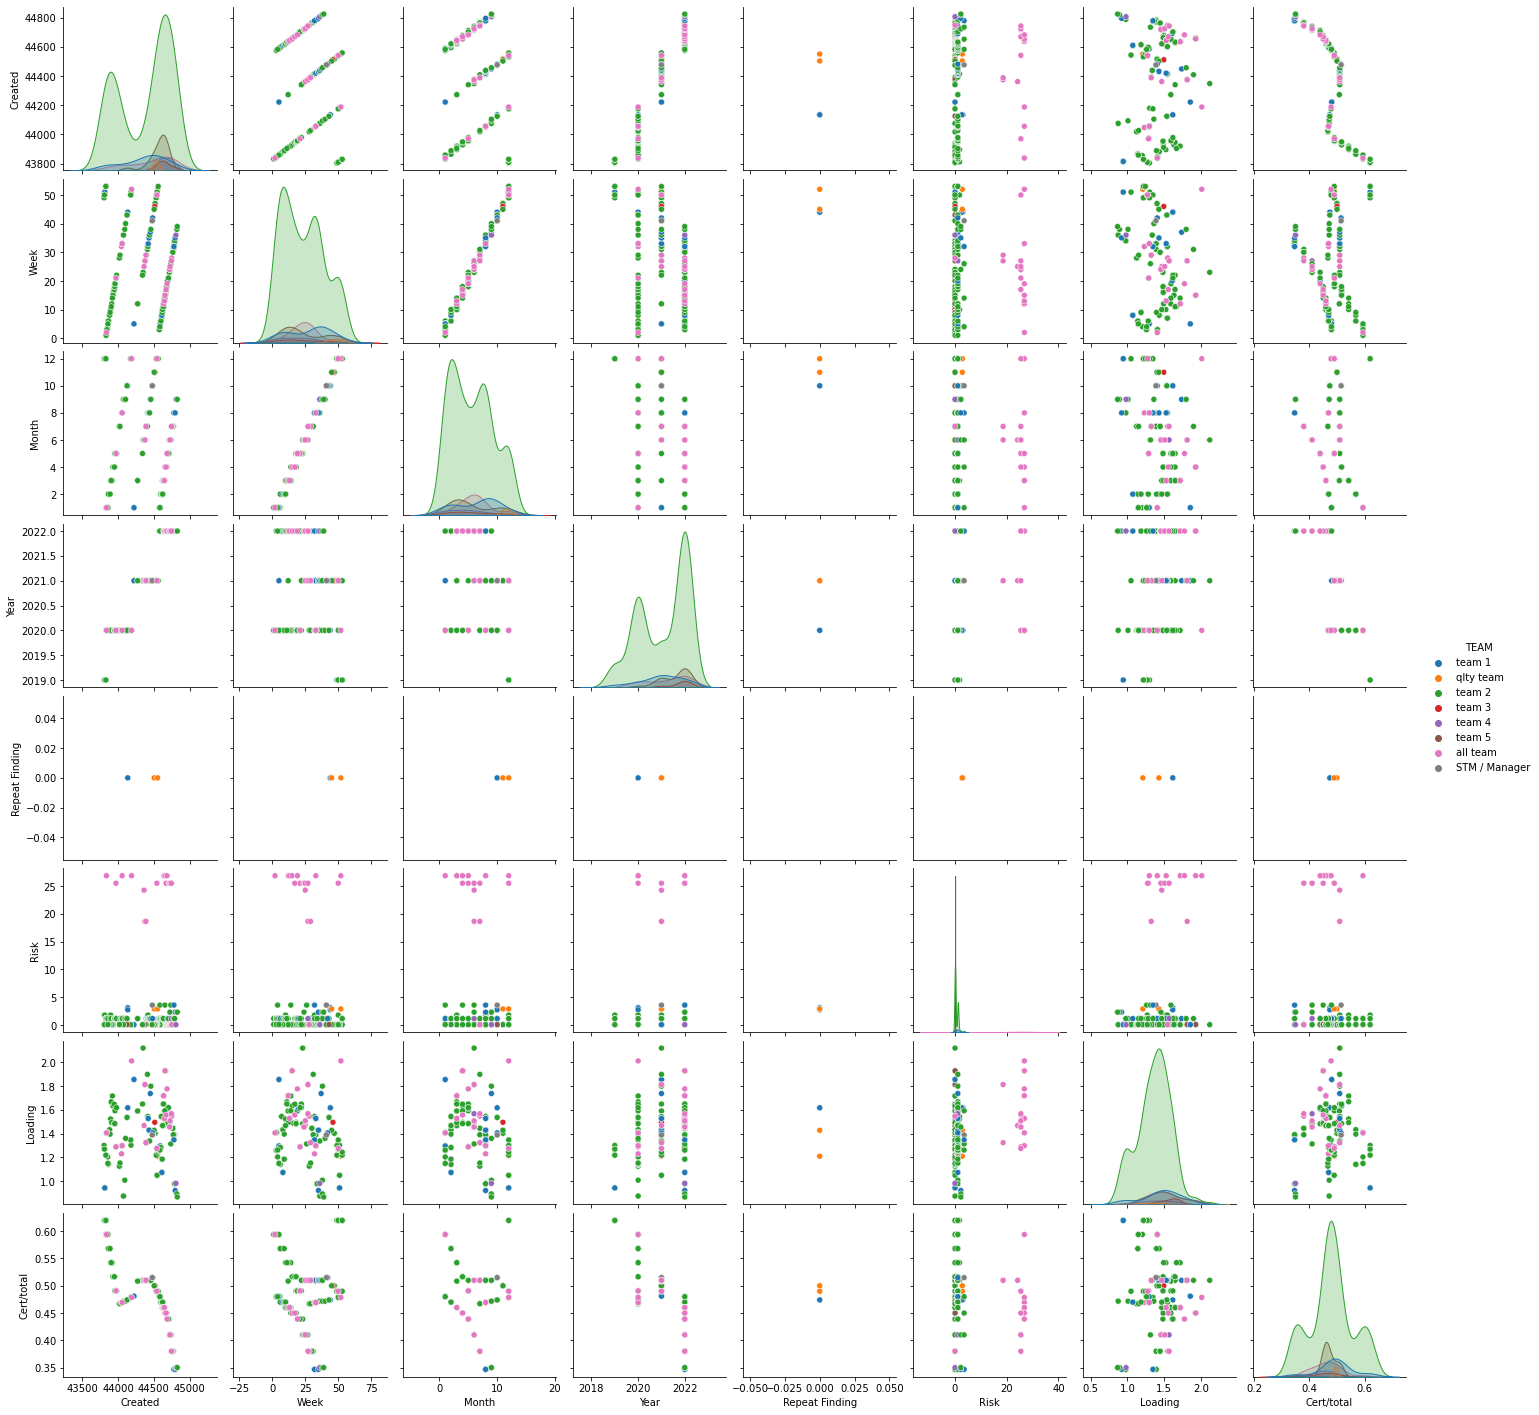

In [12]:
fig = sns.pairplot(df, hue='TEAM')

### Preparing the data

In [13]:
missing_vals = df.isnull().sum()
missing_vals

Type                                     0
Created                                  0
Week                                     0
Month                                    0
Year                                     0
Site                                     0
Finding                                  0
Repeat Finding                         279
Hangar / Shop                            0
TEAM                                     0
Main Applicable Rule (Finding Code)      0
Applicable Rules 2                     273
Main Root Cause                        262
Additional Root Causes 2               265
Cluster                                  0
Risk                                     0
Quality escape                           0
Loading                                  2
Cert/total                               0
dtype: int64

In [14]:
#"Findings" future use NLP 
#remove columns non added value, remove repetitive savannah and hangar c column
df1 = df.drop(["Hangar / Shop","Site","TEAM","Finding", "Repeat Finding", "Applicable Rules 2", "Main Root Cause", "Additional Root Causes 2"], axis=1) 
df1.head()

,Type,Created,Week,Month,Year,Main Applicable Rule (Finding Code),Cluster,Risk,Quality escape,Loading,Cert/total
0,QCAR,44134.44122,44,10,2020,11.4 - Parts/Material Management & Control,PARTS/MATERIAL MANAGEMENT & CONTROL,3.104565,No,1.616984,0.474039
1,QCAR,44134.45591,44,10,2020,13 - Current Technical Data,TECHNICAL DATA,2.726081,No,1.616984,0.474039
2,QCAR,44503.30890,45,11,2021,9.1 - Work Order Process,RECORD OF MAINTENANCE,2.888232,No,1.427862,0.500000
3,QCAR,44550.64009,52,12,2021,9.2 - Standard Documentation,RECORD OF MAINTENANCE,2.888232,No,1.209634,0.490000
4,1PY,44791.46200,34,8,2022,G4 Incomplete Work,INSPECTION & QUALITY SYSTEM,0.089446,No,0.977916,0.346801


In [15]:
df2 = df1.drop(["Created","Week", "Month", "Year"], axis=1) 
df2.head()

,Type,Main Applicable Rule (Finding Code),Cluster,Risk,Quality escape,Loading,Cert/total
0,QCAR,11.4 - Parts/Material Management & Control,PARTS/MATERIAL MANAGEMENT & CONTROL,3.104565,No,1.616984,0.474039
1,QCAR,13 - Current Technical Data,TECHNICAL DATA,2.726081,No,1.616984,0.474039
2,QCAR,9.1 - Work Order Process,RECORD OF MAINTENANCE,2.888232,No,1.427862,0.500000
3,QCAR,9.2 - Standard Documentation,RECORD OF MAINTENANCE,2.888232,No,1.209634,0.490000
4,1PY,G4 Incomplete Work,INSPECTION & QUALITY SYSTEM,0.089446,No,0.977916,0.346801


In [16]:
df3 = df2.drop(["Main Applicable Rule (Finding Code)"], axis=1) 
df3.head()

,Type,Cluster,Risk,Quality escape,Loading,Cert/total
0,QCAR,PARTS/MATERIAL MANAGEMENT & CONTROL,3.104565,No,1.616984,0.474039
1,QCAR,TECHNICAL DATA,2.726081,No,1.616984,0.474039
2,QCAR,RECORD OF MAINTENANCE,2.888232,No,1.427862,0.500000
3,QCAR,RECORD OF MAINTENANCE,2.888232,No,1.209634,0.490000
4,1PY,INSPECTION & QUALITY SYSTEM,0.089446,No,0.977916,0.346801


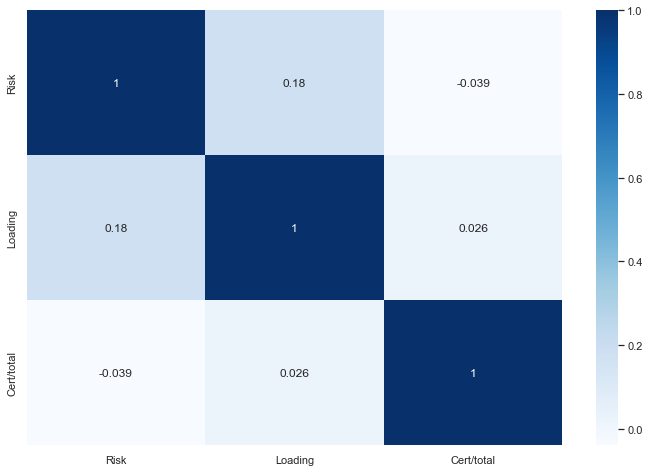

In [18]:
sns.heatmap(df3.corr(), annot=True, cmap="Blues")
sns.set(rc = {'figure.figsize':(12,8)})

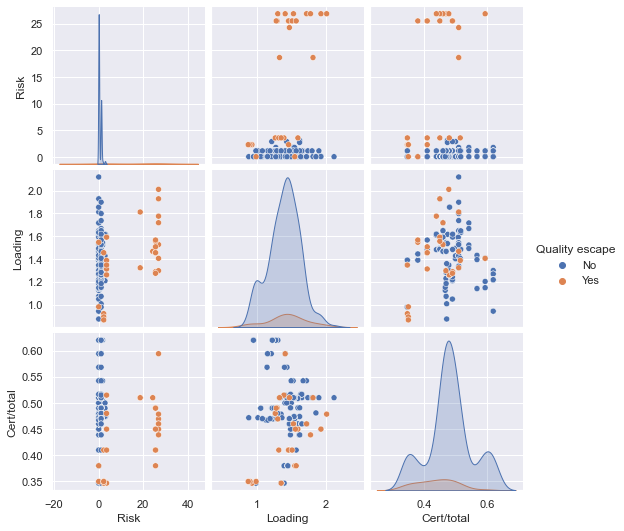

In [19]:
fig1 = sns.pairplot(df3, hue='Quality escape')

In [20]:
ans = df3['Type'].unique()
print(ans)

['QCAR' '1PY' '2PY' '3PY' 'Product Damage - Vendor' 'Product Damage - GAC'
 'Environmental Event - Spill' 'Personnel Injury - First Aid']


In [21]:
missing_vals1 = df3.isnull().sum()
missing_vals1

Type              0
Cluster           0
Risk              0
Quality escape    0
Loading           2
Cert/total        0
dtype: int64

In [23]:
df4 = df3.dropna()

In [24]:
missing_vals1 = df4.isnull().sum()
missing_vals1

Type              0
Cluster           0
Risk              0
Quality escape    0
Loading           0
Cert/total        0
dtype: int64

In [25]:
num_cols = ['Risk', 'Loading', 'Cert/total']
type_cols = ['Type']
cat_cols = ['Cluster', 'Risk', 'Quality escape']

In [32]:
df4 = pd.get_dummies(df4, columns = ['Type'])
df4

,Cluster,Risk,Quality escape,Loading,Cert/total,Type_1PY,Type_2PY,Type_3PY,Type_Environmental Event - Spill,Type_Personnel Injury - First Aid,Type_Product Damage - GAC,Type_Product Damage - Vendor,Type_QCAR
0,3,9,0,1.616984,0.474039,0,0,0,0,0,0,0,1
1,7,7,0,1.616984,0.474039,0,0,0,0,0,0,0,1
2,5,8,0,1.427862,0.500000,0,0,0,0,0,0,0,1
3,5,8,0,1.209634,0.490000,0,0,0,0,0,0,0,1
4,1,3,0,0.977916,0.346801,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,0,14,1,1.776048,0.438991,0,0,0,0,0,1,0,0
279,1,13,1,1.455548,0.410000,0,0,0,1,0,0,0,0
280,6,13,1,1.455548,0.410000,0,0,0,0,0,1,0,0
281,1,13,1,1.507306,0.410000,0,0,0,0,0,1,0,0


In [33]:
# Converting categorical columns to numerical columns
from sklearn.preprocessing import StandardScaler, LabelEncoder
encoder = LabelEncoder()
df4[cat_cols] = df3[cat_cols].apply(encoder.fit_transform)
df4.sample(7)

,Cluster,Risk,Quality escape,Loading,Cert/total,Type_1PY,Type_2PY,Type_3PY,Type_Environmental Event - Spill,Type_Personnel Injury - First Aid,Type_Product Damage - GAC,Type_Product Damage - Vendor,Type_QCAR
66,1,3,0,1.718240,0.460000,1,0,0,0,0,0,0,0
141,1,5,0,1.269203,0.619787,1,0,0,0,0,0,0,0
254,5,4,0,0.977916,0.346801,0,1,0,0,0,0,0,0
243,5,4,0,1.283031,0.470000,0,1,0,0,0,0,0,0
113,5,0,0,1.274992,0.490000,1,0,0,0,0,0,0,0
235,5,4,0,1.243728,0.490000,0,1,0,0,0,0,0,0
238,5,4,0,1.258411,0.480000,0,1,0,0,0,0,0,0


In [34]:
X = df4.drop(['Quality escape'], axis=1)
y = df4['Quality escape']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Exploring the data - Creating Models
Exploring options for models 
#### Basic Linear Regression

In [36]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn import set_config
set_config(display="diagram")

In [37]:
lr_base = LinearRegression().fit(X_train, y_train)
print(lr_base)
lr_base_mse_train = mean_squared_error(lr_base.predict(X_train),y_train)
lr_base_mse_test = mean_squared_error(lr_base.predict(X_test),y_test)
lr_base_r_squared = lr_base.score(X,y)
print(f'Baseline Score (R_squared): {lr_base_r_squared}')
print(f'Baseline (Coeficients): {lr_base.coef_}')
print(f'Baseline MSE (Training data): {lr_base_mse_train}')
print(f'Baseline MSE (Test data): {lr_base_mse_test}')

LinearRegression()
Baseline Score (R_squared): 1.0
Baseline (Coeficients): [-2.47337152e-16  8.51221502e-17 -7.21852782e-18  8.96183286e-16
 -6.25000000e-01 -6.25000000e-01  3.75000000e-01  3.75000000e-01
  3.75000000e-01  3.75000000e-01  3.75000000e-01 -6.25000000e-01]
Baseline MSE (Training data): 4.862294448549749e-31
Baseline MSE (Test data): 3.428697816486572e-31


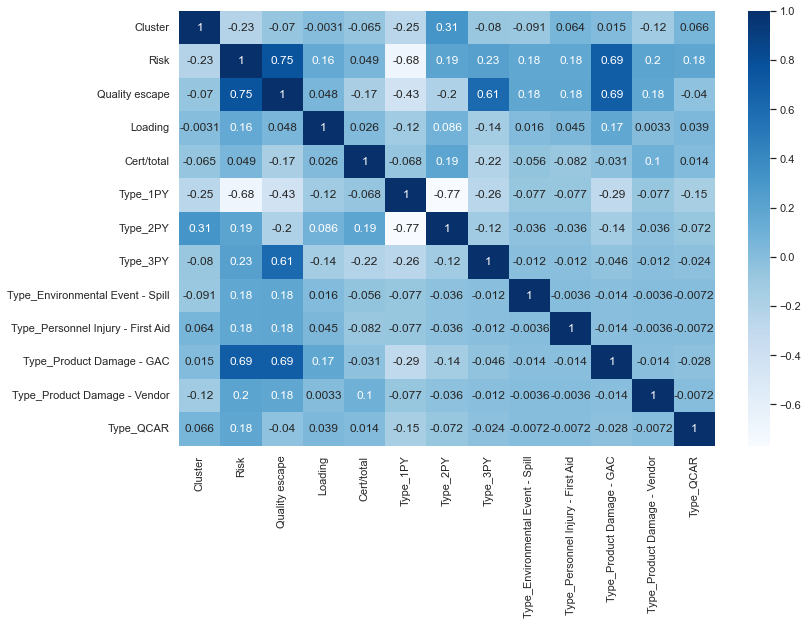

In [38]:
sns.heatmap(df4.corr(), annot=True, cmap="Blues")
sns.set(rc = {'figure.figsize':(12,8)})

#### Classification problem 
This data works best with a classification problem. A classification model using the features can predict if it will be a quality escape.

In [40]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
lr_train_mse = mean_squared_error(y_train, lr.predict(X_train))
lr_test_mse = mean_squared_error(y_test, lr.predict(X_test))
lr_acc_train = lr.score(X_train, y_train)
lr_acc_test = lr.score(X_test, y_test)
#lr_time = lr.cv_results_['mean_fit_time'].mean()
#print(lr_train_mse)
#print(lr_test_mse)
#print(lr_time)
print(f'Simple model Train score: {lr_acc_train}')
print(f'Simple model Test score: {lr_acc_test}')

Simple model Train score: 0.9904761904761905
Simple model Test score: 1.0


The accuracy is too high since the reports determine if there is a quality escape.
The columns "Type" need to be dropped from the data and then re-evaluated.